<a href="https://colab.research.google.com/github/joseph444/ml-algos/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def cost(theta,X,Y):
    """
      the cost function calculates the the cost of X and Y for some Theta
      theta : the matrix of coefficent
      X : independent Variables
      Y : dependent Variaable
      returns the cost
    """
    m=Y.shape[0]
    ypred=np.dot(X,theta)
    p1=1/(2*m)
    p2=(ypred-Y)**2
    m=p1*np.sum(p2)
    return m

In [3]:
x=np.linspace(0.1,0.9,10000)
x=np.reshape(x,(x.shape[0],1))
y=np.abs(np.ceil(1+np.log(x)))


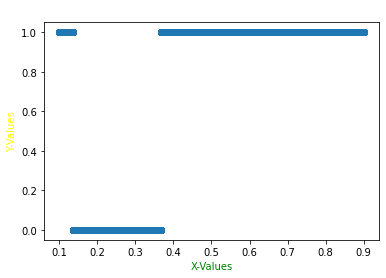

In [4]:
plt.title('Our Dataset for this one',color='white')
plt.scatter(x,y)
plt.xlabel('X-Values',color='green')
plt.ylabel('Y-Values',color='yellow')
plt.show()

In [35]:
class LogisticRegression:
    def __init__(self,lr=0.01,iterator=100):
        self.lr=lr
        self.iterator=iterator
    def fit(self,x,y):
        ones=np.ones((x.shape[0],1))
        self.x=np.hstack((ones,x))
        self.y=np.reshape(y,(y.shape[0],1))
        self.xT=np.transpose(self.x)
        self._x=x
        self.regression()

    def regression(self):
        p1=np.dot(self.xT,self.x)
        p2=np.dot(self.xT,self.y)
        self.theta=np.dot(np.linalg.inv(p1),p2)
        self._train()

    def _pred(self):
        return np.dot(self.x,self.theta)

    def _train(self):
        self.theta_history=list()
        self.cost_history=list()
        for i in range(self.iterator):
            self.theta_history.append(self.theta)
            self.cost_history.append(cost(self.theta,self.x,self.y))
            ypred=self._pred()
            m=self.y.shape[0]
            p1=self.lr/m
            q=ypred-self.y
            p2=np.dot(np.transpose(q),q)
            self.theta=self.theta-(p1*p2)
    def sigmoid(self,x):
        self.ypred=np.dot(x,self.theta)
        self.p= 1/((1 + np.exp(-self.ypred))) 
    
    def predict(self,x):
        ones=np.ones((x.shape[0],1))
        X=np.hstack((ones,x))
        self.sigmoid(X)
        return self.p
            

In [36]:
classifier=LogisticRegression()
classifier.fit(x,y)

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)


In [39]:
ypred=classifier.predict(xtest)

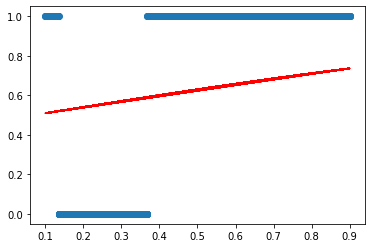

In [40]:
plt.scatter(xtest,ytest)
plt.plot(xtest,ypred,color="red")
plt.show()


In [41]:
classifier.ypred

array([[0.53376143],
       [0.11402367],
       [0.23242391],
       ...,
       [0.63288952],
       [0.08210106],
       [0.90546705]])